# 共享单车数据分析报告

## 1.导入数据和理解数据

In [1]:
# Supress Warnings 忽略警告
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 导入文件
## 训练数据和测试数据
df_bike=pd.read_csv("train.csv", parse_dates=[1])
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df_bike['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

### 各个字段的意思
- datetime 精确到小时的一个具体时间
- season 1.春天 2.夏天 3.秋天 4.冬天
- holiday 当天是否是节假日 0 不是 1 是
- workingday 当天是否是工作日 0 不是 1 是
- weather 天气情况
    - 1 晴，少云，半阴，半阴
    - 2 雾+多云，雾+碎云，雾+几云，雾
    - 3 小雪，小雨+雷雨+散云，小雨+散云
    - 4 大雨+冰雹+雷暴+雾，雪+雾
- temp 具体温度
- atemp 体感温度
- humidity 相对湿度
- windspeed 风速
- casual 用车的未注册用户的数量
- registered 用车的已注册用户的数量
- count 用车人数总数

预测后面三列

## 2.EDA与数据处理

easy data analysis

In [7]:
#shape of the dataset
df_bike.shape

(10886, 12)

In [8]:
#checking the columns
df_bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
# Check for categorical and coninuous variables
df_bike.nunique()  ## 能把每一列有多少种类打印出来

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [10]:
# 先把这个日期处理一下
# 分为月 周几 小时 pd.DatetimeIndex 是把某一列进行转换，同时把该列的数据设置为索引 index
## 分成三个新的字段
## 用pandas处理
df_bike['month'] = pd.DatetimeIndex(df_bike.datetime).month
# 周末可能和周一到周五的不一样 所以提取一下是星期几 0-6 周一到周日
df_bike['day'] = pd.DatetimeIndex(df_bike.datetime).weekday
df_bike['hour'] = pd.DatetimeIndex(df_bike.datetime).hour

In [11]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


In [15]:
# 既然把datetime拆分为了三列，就可以把原来这个删除了
## datetime没有用了
df_bike = df_bike.drop(['datetime'], axis=1)

KeyError: "['datetime'] not found in axis"

In [17]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 1.2+ MB


### 缺失值处理

In [18]:
df_bike.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
month         0
day           0
hour          0
dtype: int64

- 从结果上看没有缺失值，并不用做数据缺失值处理

### 异常值处理

holiday          AxesSubplot(0.125,0.749828;0.227941x0.130172)
workingday    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
weather       AxesSubplot(0.672059,0.749828;0.227941x0.130172)
temp             AxesSubplot(0.125,0.593621;0.227941x0.130172)
atemp         AxesSubplot(0.398529,0.593621;0.227941x0.130172)
humidity      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
windspeed        AxesSubplot(0.125,0.437414;0.227941x0.130172)
casual        AxesSubplot(0.398529,0.437414;0.227941x0.130172)
registered    AxesSubplot(0.672059,0.437414;0.227941x0.130172)
count            AxesSubplot(0.125,0.281207;0.227941x0.130172)
month         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
day           AxesSubplot(0.672059,0.281207;0.227941x0.130172)
hour                AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

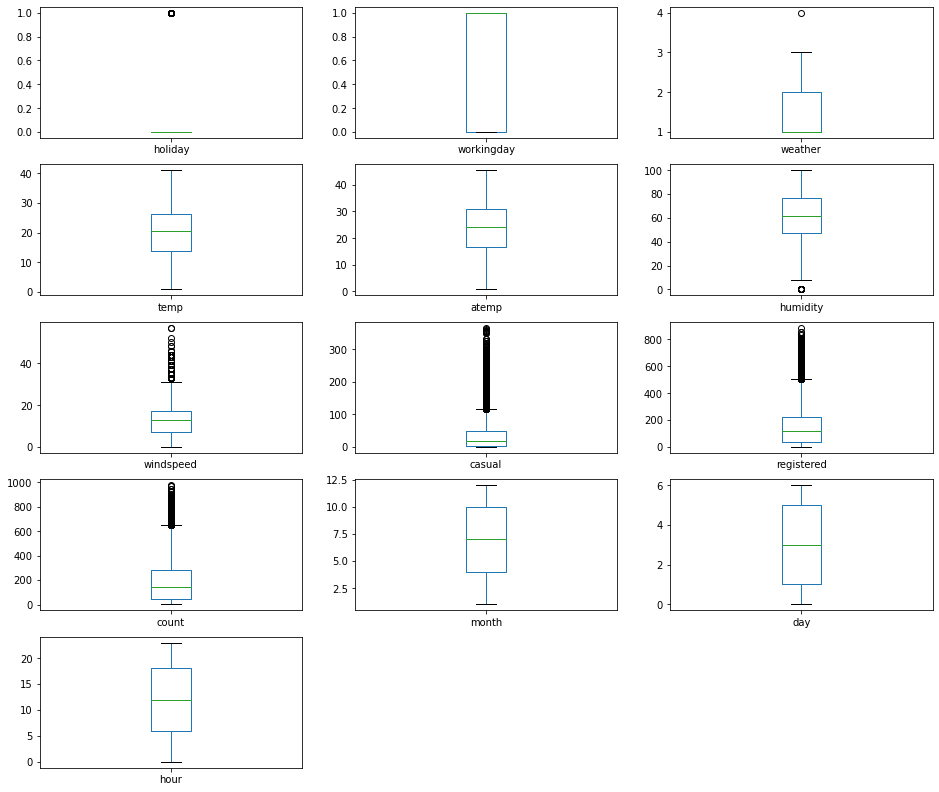

In [23]:
# 画出每个特征的箱图，分析离群点
df_bike.plot(kind='box', subplots=True, layout=(5,3), sharex=False,sharey=False, figsize=(16,14))# 每个特征的箱图

可以看到windspeed风速是存在异常值的，对于未注册用车用户，和已注册用车用户对结果count没有作用，因为是先统计出来count再统计的这两个字段，所以没有实际作用，在给出预测数据的时候也不会提供这两个字段的值，所以对这两个字段不予处理，后续会删除，对于count再进行后续分析。

In [19]:
df_bike["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [20]:
# 处理风速的异常值
a = df_bike["windspeed"].quantile(0.75)
b = df_bike["windspeed"].quantile(0.25)
# 直接用的 “=” ，修改c的时候也会修改原数据集
c = df_bike["windspeed"]
# 超过了上四分位1.5倍四分位距或下四分位1.5倍距离都算异常值，先设置为空值
c[(c>=(a-b)*1.5+a)|(c<=b-(a-b)*1.5)]=np.nan
# 用中位数填充空值
c.fillna(c.median(),inplace=True)

In [21]:
c

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
5         6.0032
6         0.0000
7         0.0000
8         0.0000
9         0.0000
10       16.9979
11       19.0012
12       19.0012
13       19.9995
14       19.0012
15       19.9995
16       19.9995
17       19.0012
18       16.9979
19       16.9979
20       16.9979
21       12.9980
22       15.0013
23       19.9995
24       19.9995
25       16.9979
26       19.0012
27       12.9980
28       12.9980
29       19.9995
          ...   
10856    22.0028
10857    26.0027
10858    16.9979
10859    15.0013
10860     0.0000
10861     6.0032
10862     0.0000
10863     6.0032
10864     6.0032
10865     8.9981
10866     8.9981
10867     6.0032
10868     6.0032
10869     8.9981
10870     7.0015
10871     7.0015
10872     7.0015
10873    15.0013
10874    19.0012
10875    12.9980
10876    12.9980
10877    19.0012
10878    23.9994
10879    26.0027
10880    23.9994
10881    26.0027
10882    15.0013
10883    15.00

{'whiskers': [<matplotlib.lines.Line2D at 0x264c57a4b38>,
 'caps': [<matplotlib.lines.Line2D at 0x264c57a4f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x264c57a4710>],
 'medians': [<matplotlib.lines.Line2D at 0x264c5799898>],
 'fliers': [<matplotlib.lines.Line2D at 0x264c5799be0>],
 'means': []}

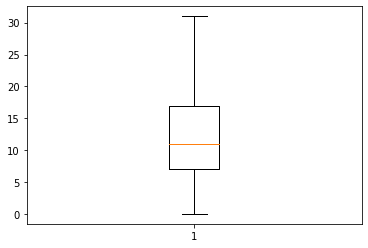

In [22]:
# 处理后的风速的箱线图
plt.boxplot(df_bike['windspeed'])

In [23]:
a = df_bike["count"].quantile(0.75)
b = df_bike["count"].quantile(0.25)
c = df_bike["count"]
# 查看异常值的个数
c[(c>=(a-b)*1.5+a)|(c<=b-(a-b)*1.5)].value_counts().sum()

303

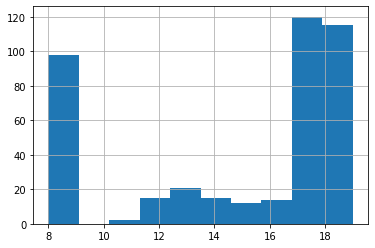

In [24]:
# 查看一下count中异常值真的是是异常值吗
df_bike.loc[df_bike['count'] > 600 ]['hour'].hist()

这个明显是早高峰和晚高峰，上下班的时间点，不太算异常值，但是还是查看一下下午五六点的时候租车数量是多少，如何分布。

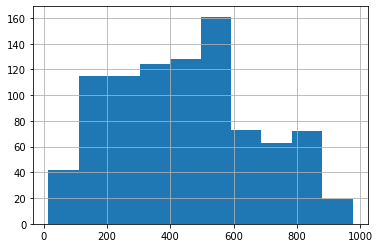

In [25]:
df_bike.loc[(df_bike['hour'] == 18) | (df_bike['hour'] == 17) ]['count'].hist()

看分布来看的话，平时都是120-160，偶尔租车数量增加也是可以理解的，所以不处理count这一列了

### 检查下数据的类别

In [26]:
# Check for categorical and coninuous variables
df_bike.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      16
casual        309
registered    731
count         822
month          12
day             7
hour           24
dtype: int64

- Season, yr, month, weekdays, working day, weathersit- are categorical variables 

In [27]:
#Statstical info of columns
df_bike.describe().T

,count,mean,std,min,25%,50%,75%,max
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.0000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.0000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.0000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.5000,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.2400,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.0000,77.0000,100.0000
windspeed,10886.0,12.265824,7.365329,0.00,7.0015,11.0014,16.9979,31.0009
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.0000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.0000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.0000,284.0000,977.0000


从数据中可以看出每个字段的最小也都大于0，没有出现小于0的异常值

In [28]:
#使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables）
# weatherDf=pd.DataFrame()
# weatherDf=pd.get_dummies(df_bike['weather'],prefix='weather')

#将虚拟变量列添加到full
# df_bike=pd.concat([df_bike, weatherDf],axis=1)

In [ ]:
df_bike.hist(figsize=(16,15))    # 使用hist查看每一列的分布直方图

# 3.数据可视化

In [ ]:
#Pairplot to show the coorelation between variables
sns.pairplot(df_bike);

- Registered and casual variables are highly correlated with cnt and its because sum of casual and registered equals count of bike sales 


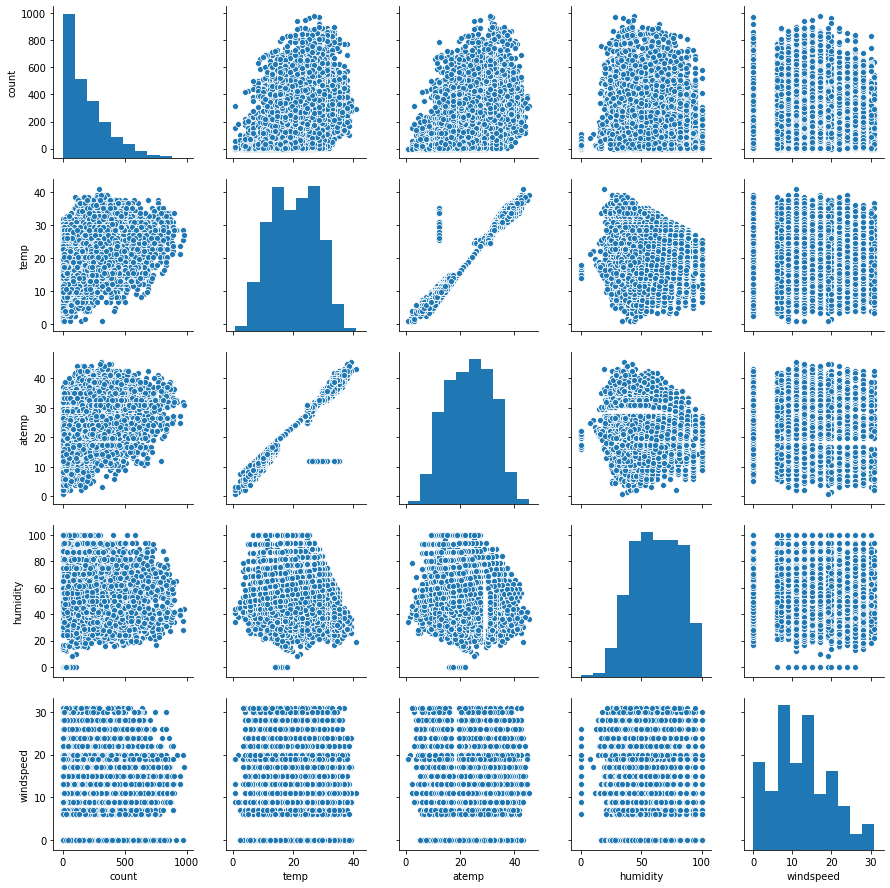

In [35]:
# correlation between continuous variables
sns.pairplot(df_bike,vars=['count','temp', 'atemp', 'humidity', 'windspeed'])

In [39]:
# correlation between continuous variables 线性关系
df_bike[['count', 'casual','registered','temp', 'atemp', 'humidity', 'windspeed']].corr()

,count,casual,registered,temp,atemp,humidity,windspeed
count,1.000000,0.690414,0.970948,0.394454,0.389784,-0.317371,0.112830
casual,0.690414,1.000000,0.497250,0.467097,0.462067,-0.348187,0.102122
registered,0.970948,0.497250,1.000000,0.318571,0.314635,-0.265458,0.101540
temp,0.394454,0.467097,0.318571,1.000000,0.984948,-0.064949,-0.002986
atemp,0.389784,0.462067,0.314635,0.984948,1.000000,-0.043536,-0.039928
humidity,-0.317371,-0.348187,-0.265458,-0.064949,-0.043536,1.000000,-0.295007
windspeed,0.112830,0.102122,0.101540,-0.002986,-0.039928,-0.295007,1.000000


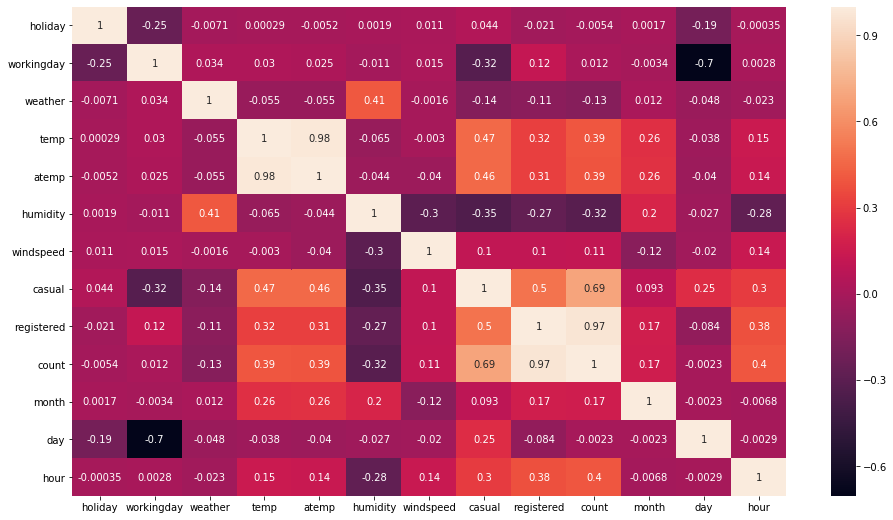

In [36]:
# 使用热度图可视化这个相关系数矩阵
plt.figure(figsize=(16,9))# 设置画布大小
# annot默认为False，当annot为True时，会在heatmap中每个方格写入数据，更便于查看
sns.heatmap(df_bike.corr(),annot=True)

相关性关系对应

相关系数r的绝对值一般在0.8以上，认为A和B有强的相关性

0.3到0.8之间，可以认为有弱的相关性

0.3以下，认为没有相关性

使用相关性矩阵函数.corr()，(ascending=False) 得出与生存情况相关性的特征的降序排列

In [38]:
#查看各特征与用户量相关性的排列  相关性排序
#ascending=False为降序
df_bike.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
month         0.166862
windspeed     0.112830
workingday    0.011594
day          -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

结论1：

总租借数量（count）成正相关的有：

- hour
- temp
- atemp
- month
- windspeed
- workingday

总租借数量（count）成负相关的有：

- day
- holiday
- weather
- humidity

### 季节与租车人数的关系

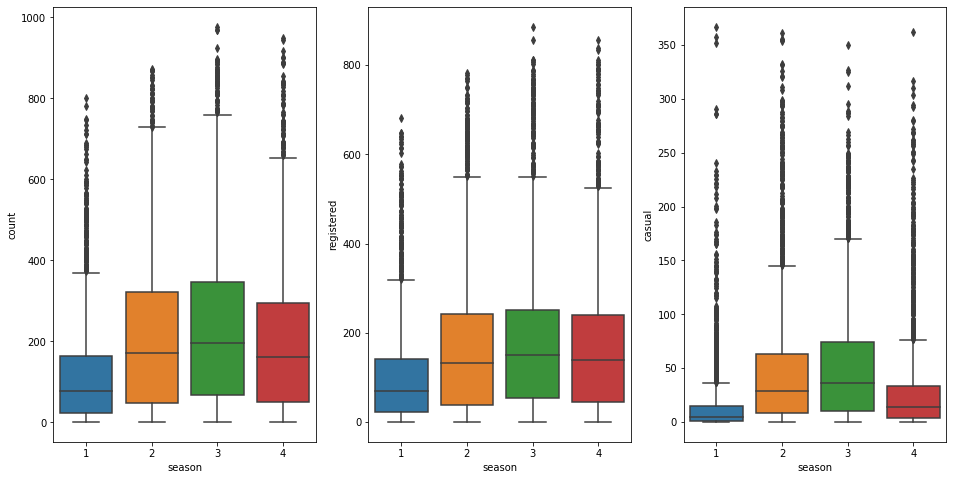

In [39]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(16, 8)
sns.boxplot(x="season",y="count",data=df_bike,ax=axes[0]);
sns.boxplot(x="season",y="registered",data=df_bike,ax=axes[1]);
sns.boxplot(x="season",y="casual",data=df_bike,ax=axes[2]);
plt.show()

夏季、秋季使用人数较多。春季使用人数最少。

### 天气与租车人数的关系

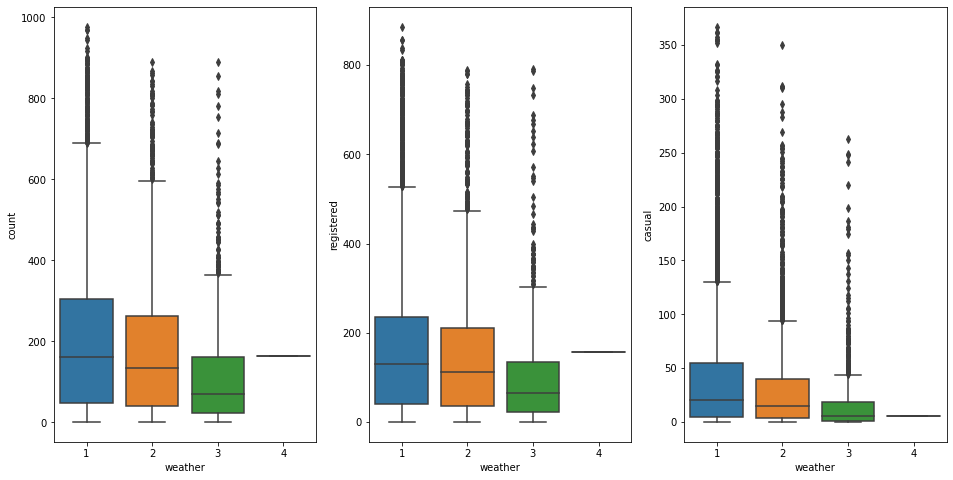

In [43]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(16, 8)
sns.boxplot(x="weather",y="count",data=df_bike,ax=axes[0]);
sns.boxplot(x="weather",y="registered",data=df_bike,ax=axes[1]);
sns.boxplot(x="weather",y="casual",data=df_bike,ax=axes[2]);
plt.show()

天气越好，使用人数越多，大雨、大雪等极端天气下几乎没有用户使用。

天气好时的用车中位数明显高于坏天气的中位数。

### 温度、体感温度与租车人数的关系

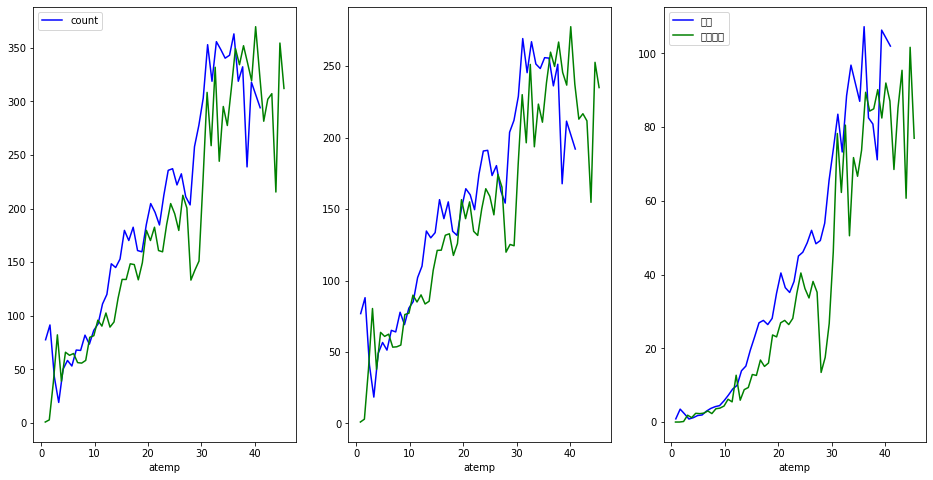

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(16, 8)
df_bike.groupby('temp').mean()["count"].plot(linestyle="-",color="b",ax=axes[0],legend=["wendu "])
df_bike.groupby('atemp').mean()["count"].plot(linestyle="-",color='g',ax=axes[0])
plt.legend(["温度","体感温度"])
df_bike.groupby('temp').mean()["registered"].plot(linestyle="-",color="b",ax=axes[1])
df_bike.groupby('atemp').mean()["registered"].plot(linestyle="-",color='g',ax=axes[1])
plt.legend(["温度","体感温度"])
df_bike.groupby('temp').mean()["casual"].plot(linestyle="-",color="b",ax=axes[2])
df_bike.groupby('atemp').mean()["casual"].plot(linestyle="-",color='g',ax=axes[2])
plt.legend(["温度","体感温度"])
plt.show()

温度越高，用户使用率越高；温度高于37°C,体感温度高于34°C时，用户使用率降低。

### 湿度与租车人数的关系

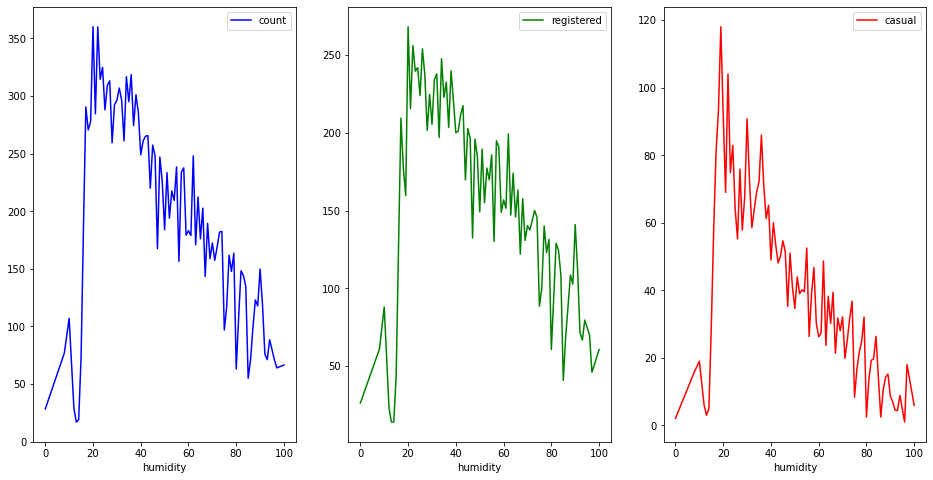

In [46]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(16, 8)
df_bike.groupby('humidity').mean()["count"].plot(linestyle='-',color='b',ax=axes[0],legend=" ")
df_bike.groupby('humidity').mean()["registered"].plot(linestyle="-",color='g',ax=axes[1],legend=" ")
df_bike.groupby('humidity').mean()["casual"].plot(linestyle="-",color='r',ax=axes[2],legend=" ")
plt.show()

湿度为20~40时，用户使用率最高。

0~20时用户使用率较低；

湿度>20后用户使用率下降。

### 风速与租车人数的关系


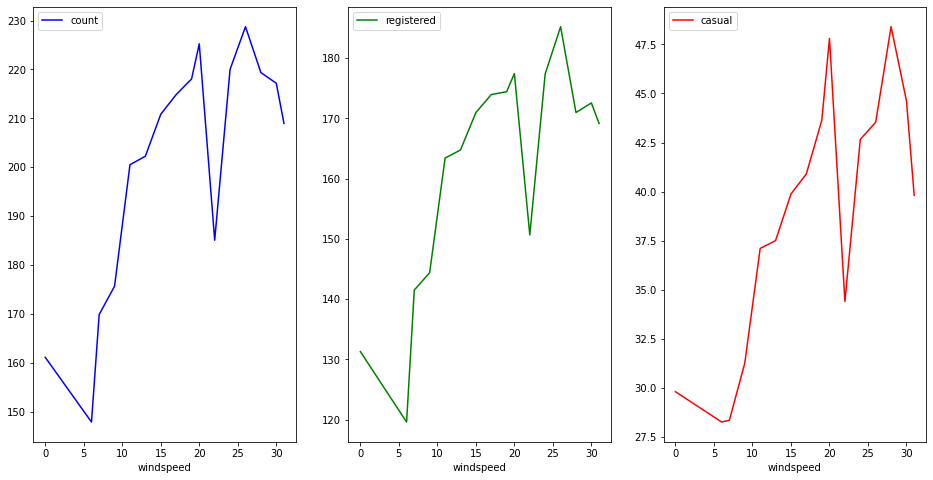

In [47]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(16, 8)
df_bike.groupby('windspeed').mean()["count"].plot(linestyle='-',color='b',ax=axes[0],legend=" ")
df_bike.groupby('windspeed').mean()["registered"].plot(linestyle="-",color='g',ax=axes[1],legend=" ")
df_bike.groupby('windspeed').mean()["casual"].plot(linestyle="-",color='r',ax=axes[2],legend=" ")
plt.show()

风速大于20时，使用人数大幅下降。

小于20租车人数始终保持在较高数量


### 月份与租车人数的关系

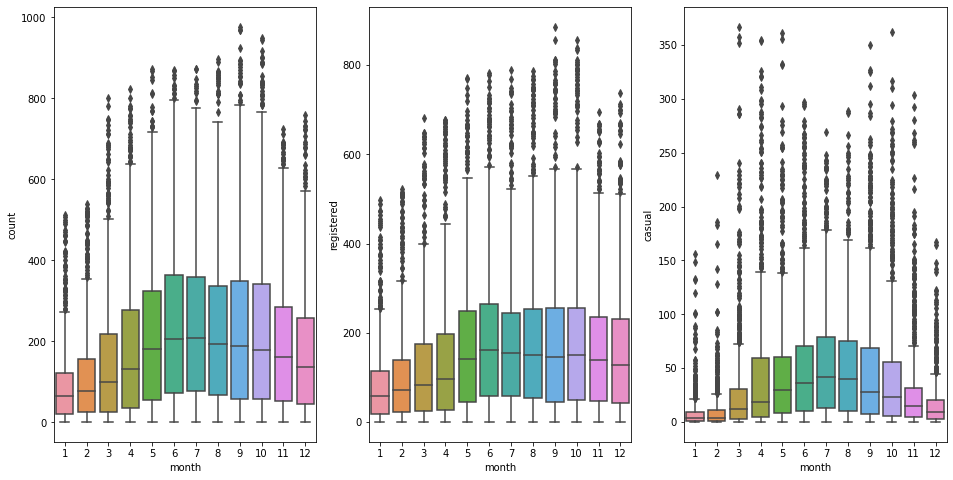

In [48]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(16, 8)
sns.boxplot(x="month",y="count",data=df_bike,ax=axes[0]);
sns.boxplot(x="month",y="registered",data=df_bike,ax=axes[1]);
sns.boxplot(x="month",y="casual",data=df_bike,ax=axes[2]);
plt.show()

气温最低的1、2月份使用人数最少。

2-4月租车人数逐月提升，6-10月达到峰值并趋于平缓，10月后出现下降。

### 工作日与租车人数的关系

ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (10886).

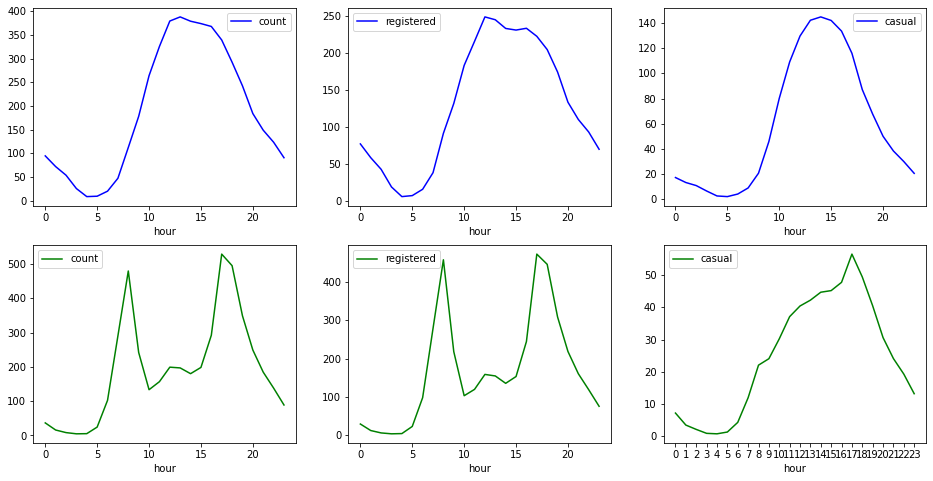

In [49]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(16, 8)
df_bike[df_bike["workingday"]==0].groupby('hour').mean()["count"].plot(linestyle='-',color='b',ax=axes[0][0],legend=" ")
df_bike[df_bike["workingday"]==0].groupby('hour').mean()["registered"].plot(linestyle='-',color='b',ax=axes[0][1],legend=" ")
df_bike[df_bike["workingday"]==0].groupby('hour').mean()["casual"].plot(linestyle='-',color='b',ax=axes[0][2],legend=" ")
df_bike[df_bike["workingday"]==1].groupby('hour').mean()["count"].plot(linestyle='-',color='g',ax=axes[1][0],legend=" ")
df_bike[df_bike["workingday"]==1].groupby('hour').mean()["registered"].plot(linestyle='-',color='g',ax=axes[1][1],legend=" ")
df_bike[df_bike["workingday"]==1].groupby('hour').mean()["casual"].plot(linestyle='-',color='g',ax=axes[1][2],legend=" ")
plt.xticks(range(24),df_bike['hour'],fontsize=15)
plt.show()

非工作日：用户数集中在白天；

工作日： 注册用户使用时间集中在上下班高峰期；非注册用户使用时间集中在白天。



### 假期与租车人数的关系

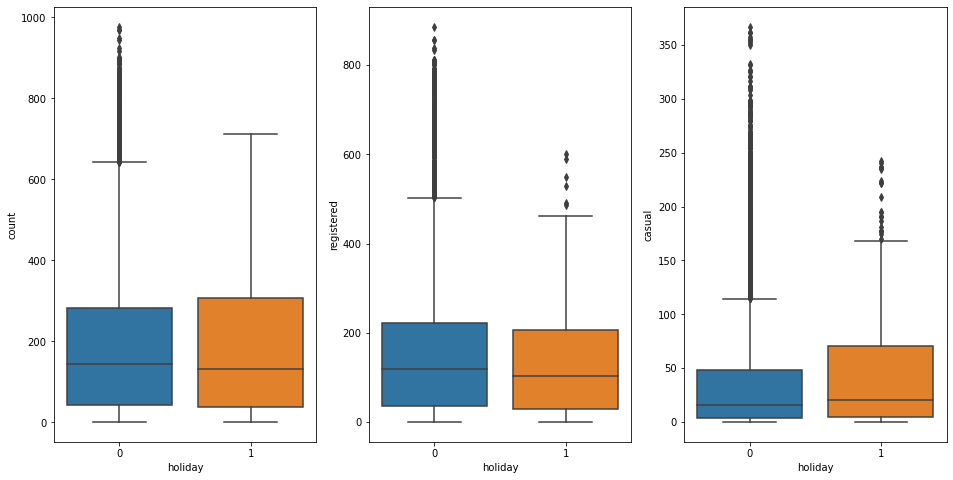

In [50]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(16, 8)
sns.boxplot(x='holiday',y='count',data=df_bike,ax=axes[0]);
sns.boxplot(x="holiday",y="registered",data=df_bike,ax=axes[1]);
sns.boxplot(x="holiday",y="casual",data=df_bike,ax=axes[2]);
plt.show()

对于注册用户，非节假日使用率高于节假日；

而对非注册用户，节假日使用率更高。